<a href="https://colab.research.google.com/github/soubsoub/journal_style/blob/main/demo_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/soubsoub/journal_style/blob/main/demo_colab.ipynb)


# journal_style - Demo Notebook

This notebook demonstrates how to use `journal_style.py` in Google Colab to produce
publication-ready figures for scientific journals.

**Supported journals:** `nature`, `elsevier`, `acs`, `ieee`, `plos`

**Recommended:** Runtime → Run all  

## Step 1 - Download journal_style.py from GitHub

In [1]:
# Download journal_style.py only if not present
import os, urllib.request

URL = "https://raw.githubusercontent.com/soubsoub/journal_style/main/journal_style.py"
MODULE = "journal_style.py"

if not os.path.exists(MODULE):
    print("Downloading journal_style.py ...")
    urllib.request.urlretrieve(URL, MODULE)
else:
    print("journal_style.py already present")

# Optional dependency for some journal styles
!pip -q install SciencePlots


journal_style.py already present


## Step 2 - Imports and shared data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from journal_style import journal_style, set_color_style, set_grayscale_style, reset_style

plt.rcParams["figure.dpi"] = 300

x = np.linspace(0, 2 * np.pi, 200)

## Example 1 - Color style, Nature single column

/content/journal_style.py:220: UserWarning: None of the preferred fonts ['Arial', 'Helvetica'] found on this system. Falling back to 'DejaVu Sans'.
  rc = _build_rc()


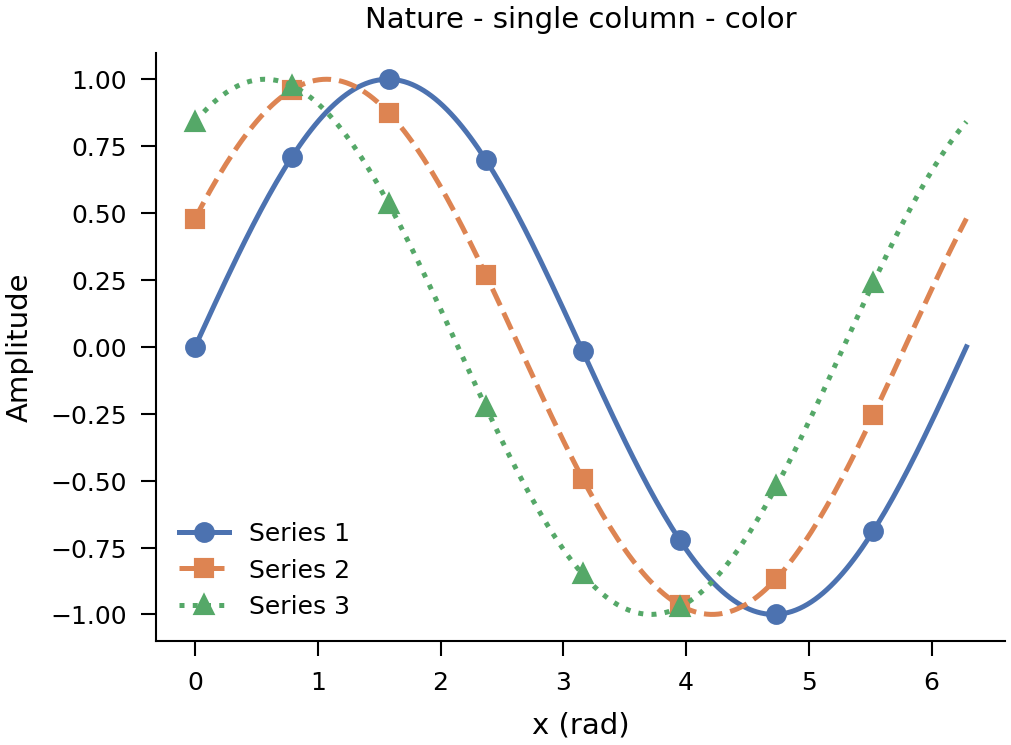

figsize_single = (3.54, 2.6550000000000002)
figsize_double = (7.08, 5.3100000000000005)


In [3]:
with journal_style("nature", mode="color") as palette:
    fig, ax = plt.subplots(figsize=palette.figsize_single)
    for i, (col, ls, mk) in enumerate(palette.cycle(3)):
        ax.plot(x, np.sin(x + i * 0.5), color=col, linestyle=ls,
                marker=mk, markevery=25, label=f"Series {i + 1}")
    ax.set_xlabel("x (rad)")
    ax.set_ylabel("Amplitude")
    ax.set_title("Nature - single column - color")
    ax.legend()
    plt.tight_layout()
    plt.show()
    print(f"figsize_single = {palette.figsize_single}")
    print(f"figsize_double = {palette.figsize_double}")

## Example 2 - Grayscale style, IEEE double column

/content/journal_style.py:255: UserWarning: None of the preferred fonts ['Arial', 'Helvetica'] found on this system. Falling back to 'DejaVu Sans'.
  rc = _build_rc({"image.cmap": "gray"})


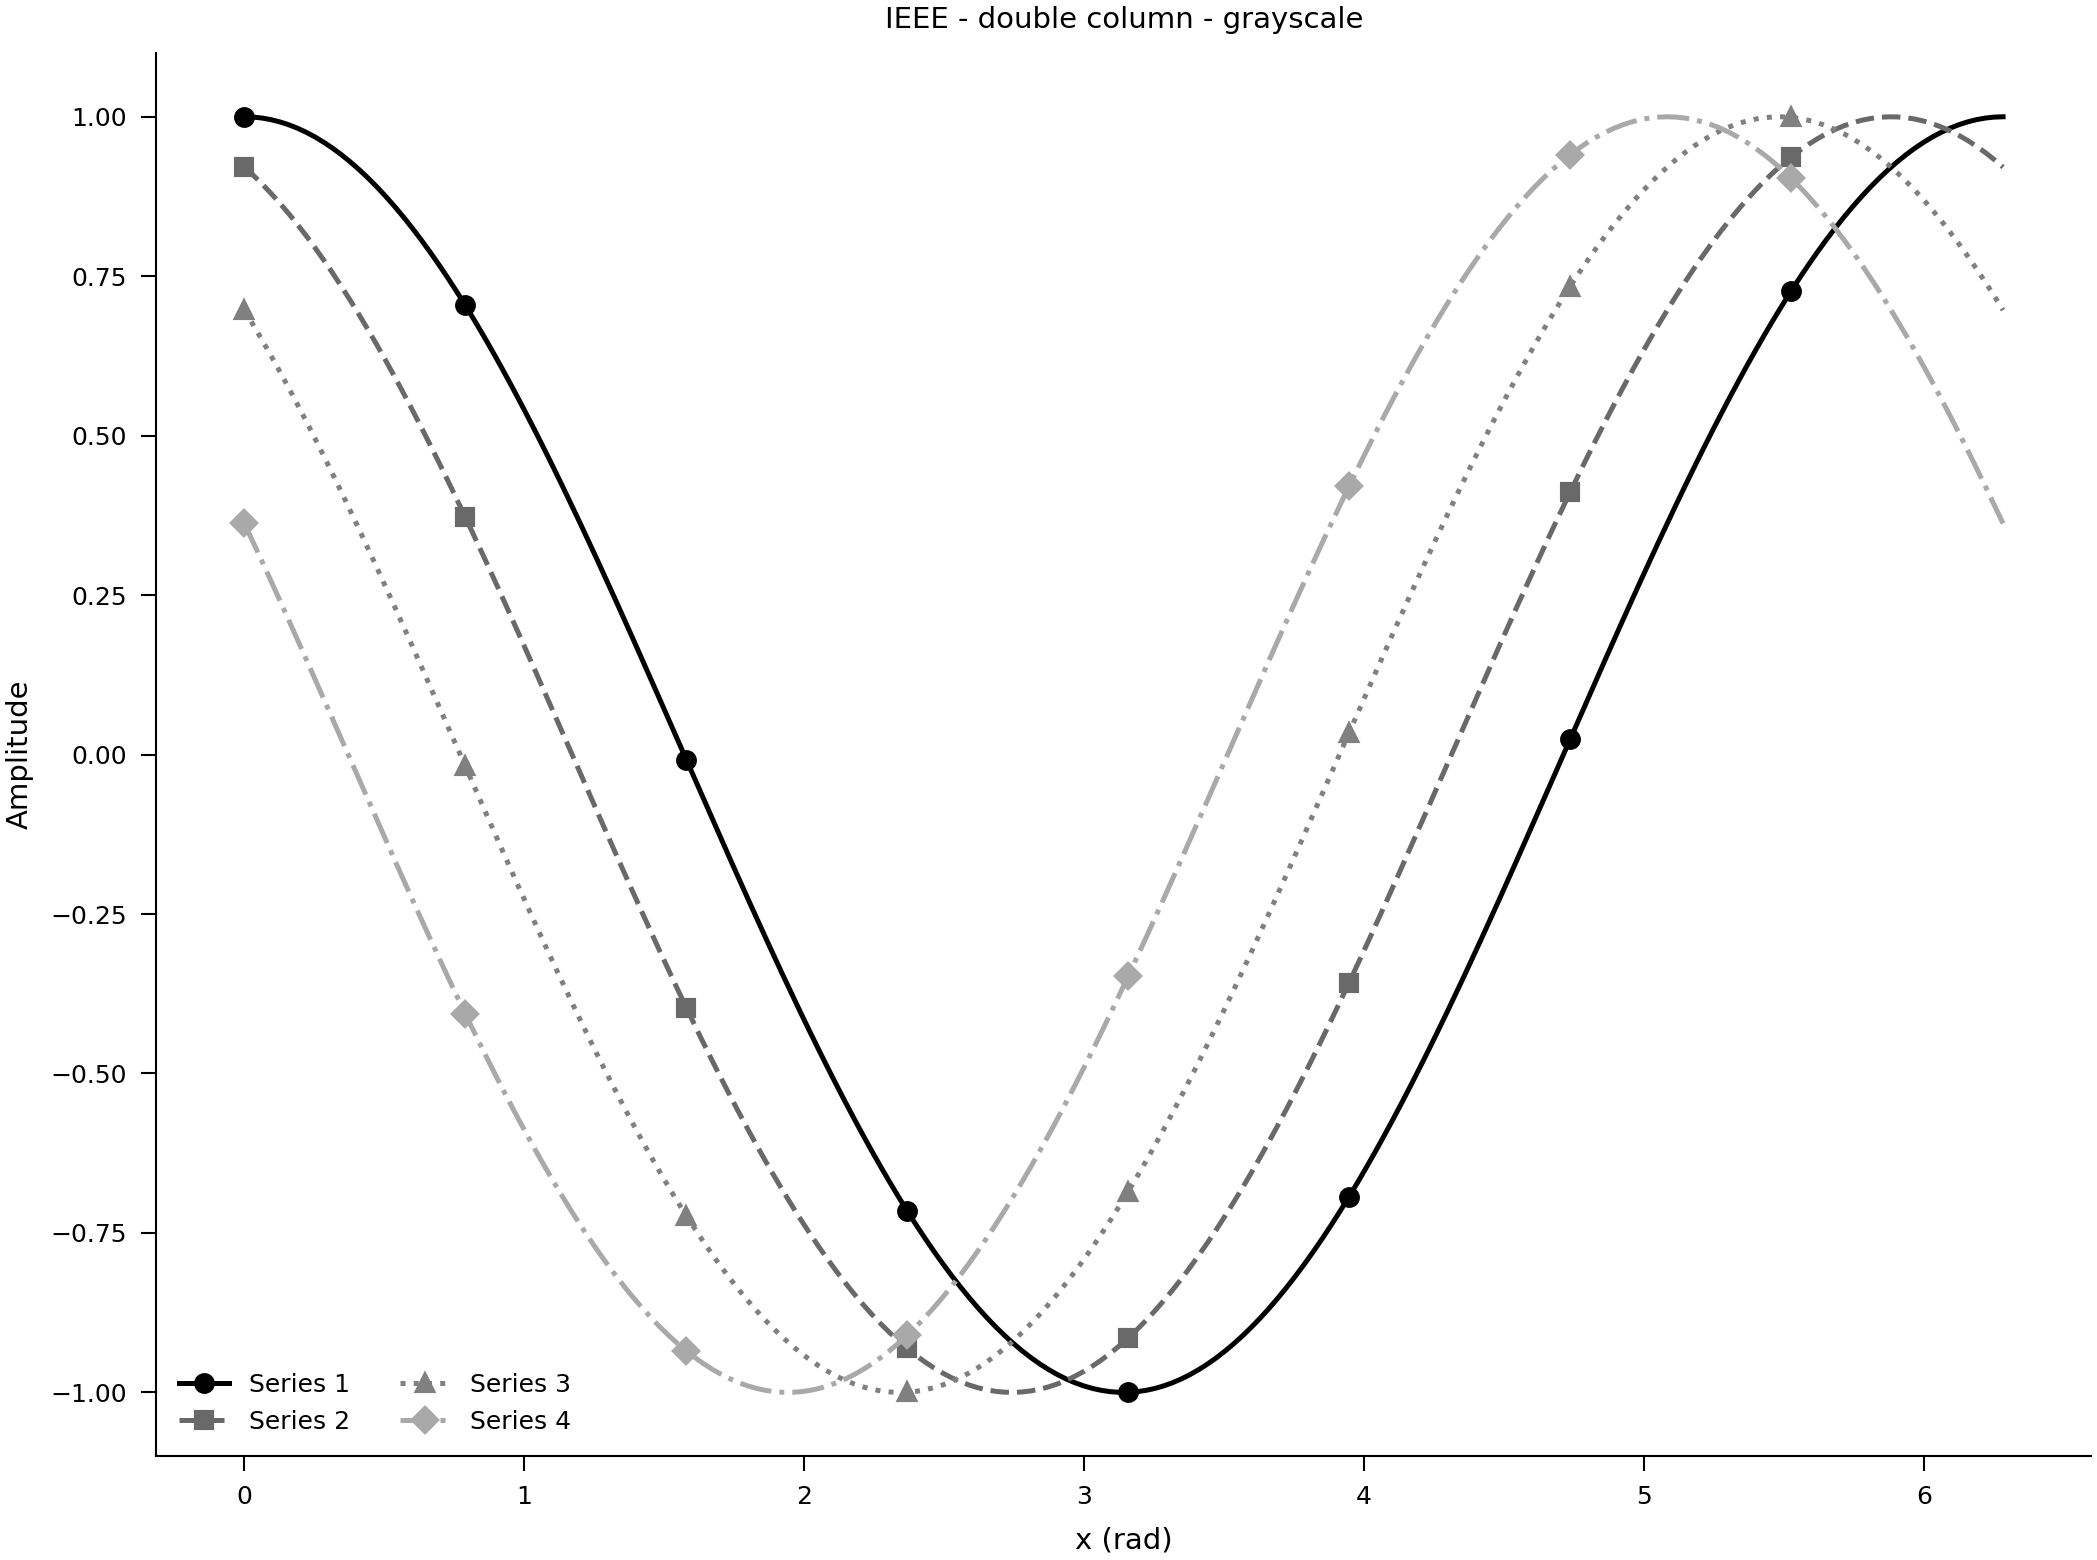

In [4]:
with journal_style("ieee", mode="grayscale") as palette:
    fig, ax = plt.subplots(figsize=palette.figsize_double)
    for i, (col, ls, mk) in enumerate(palette.cycle(4)):
        ax.plot(x, np.cos(x + i * 0.4), color=col, linestyle=ls,
                marker=mk, markevery=25, label=f"Series {i + 1}")
    ax.set_xlabel("x (rad)")
    ax.set_ylabel("Amplitude")
    ax.set_title("IEEE - double column - grayscale")
    ax.legend(ncol=2)
    plt.tight_layout()
    plt.show()

## Example 3 - Compare all journal presets (figsize)

In [5]:
from journal_style import _JOURNAL_SPECS

print(f"{'Journal':<10}  {'Single col (in)':<18}  {'Double col (in)'}")
print("-" * 50)
for name, spec in _JOURNAL_SPECS.items():
    print(f"{name:<10}  {spec['single']:<18}  {spec['double']}")

Journal     Single col (in)     Double col (in)
--------------------------------------------------
nature      3.54                7.08
elsevier    3.54                7.48
acs         3.33                7.0
ieee        3.5                 7.16
plos        5.2                 6.83


## Save a figure as PDF (journal-ready)

Fonts are embedded as Type 1 (required by most journals). DPI is set to 600 for `savefig`.

/content/journal_style.py:220: UserWarning: None of the preferred fonts ['Arial', 'Helvetica'] found on this system. Falling back to 'DejaVu Sans'.
  rc = _build_rc()


Saved figure1.pdf


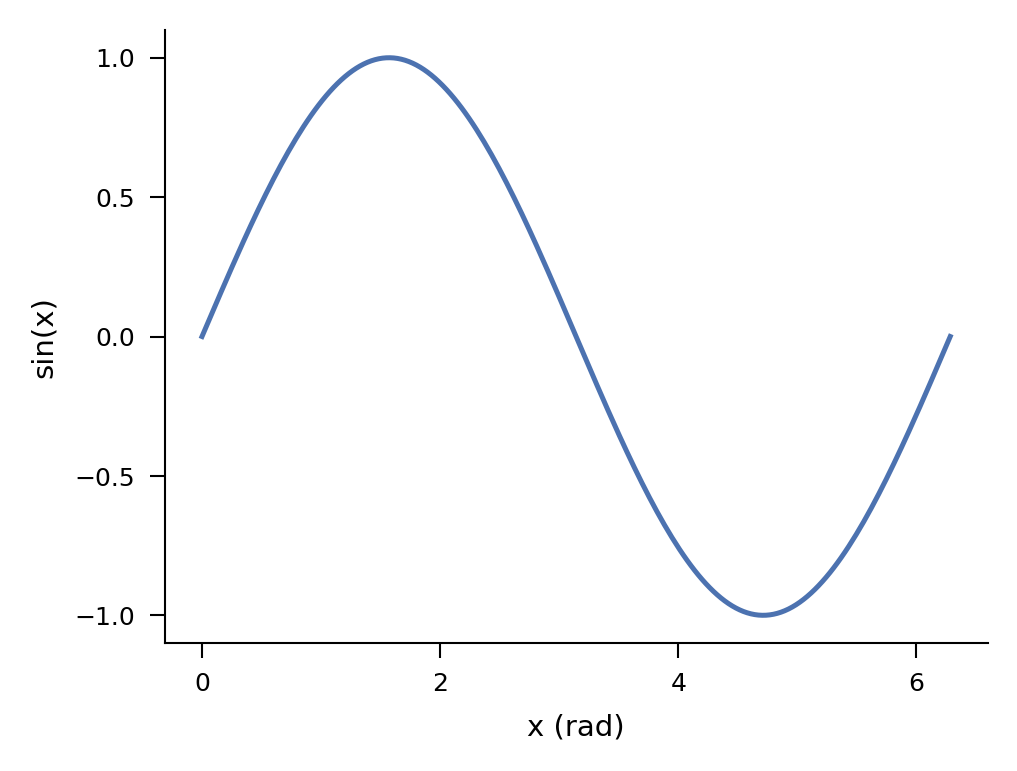

In [6]:
with journal_style("nature", mode="color") as palette:
    fig, ax = plt.subplots(figsize=palette.figsize_single)
    ax.plot(x, np.sin(x), color=palette.colors[0])
    ax.set_xlabel("x (rad)")
    ax.set_ylabel("sin(x)")
    fig.savefig(
    "nature_single_column.pdf",
    bbox_inches="tight",
    transparent=True
)
    print("Saved figure1.pdf")

/content/journal_style.py:220: UserWarning: None of the preferred fonts ['Arial', 'Helvetica'] found on this system. Falling back to 'DejaVu Sans'.
  rc = _build_rc()


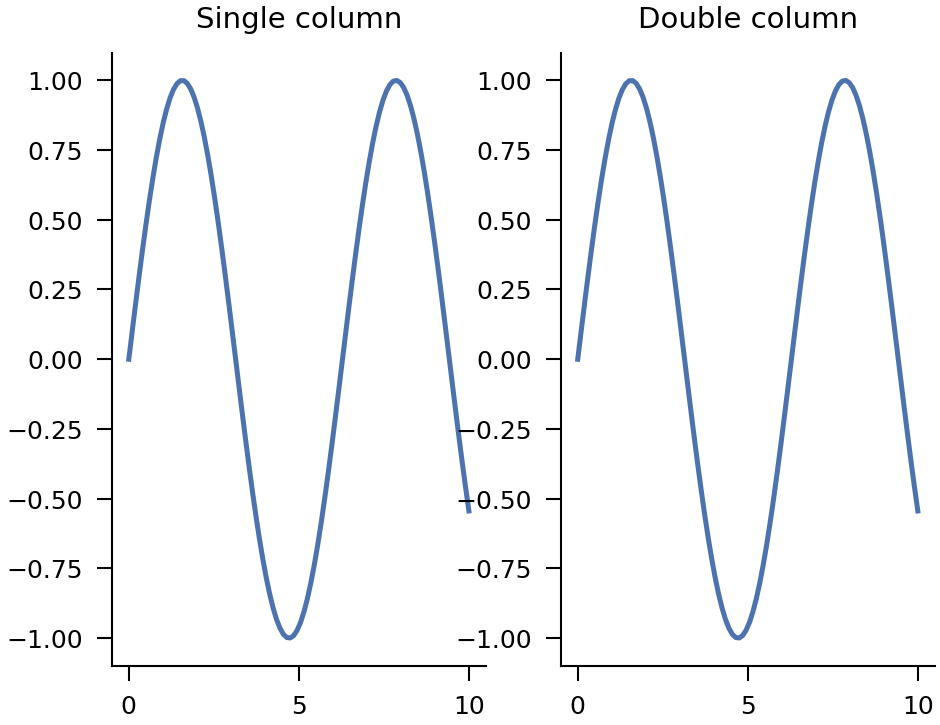

In [7]:
with journal_style("nature") as palette:

    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    axes[0].set_title("Single column")
    axes[1].set_title("Double column")

    for ax in axes:
        ax.plot(np.linspace(0, 10, 100), np.sin(np.linspace(0, 10, 100)))

    fig.set_size_inches(palette.figsize_single)
    plt.show()

    fig.set_size_inches(palette.figsize_double)
    plt.show()
